In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist

# input image dimensions 28x28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Using TensorFlow backend.


In [2]:
import numpy as np
#my own dataset
x_my = []
y_my = []
##建立計算數值個數的矩陣
count = [0,0,0,0,0,0,0,0,0,0]
##利用當數自取了一百個即不取
for i in range(2500):
    if count[y_train[i]] < 100:
        x_my.append(x_train[i])
        y_my.append(y_train[i])
        count[y_train[i]] = count[y_train[i]]+1  

x_my = np.array(x_my)
y_my = np.array(y_my)
print(x_my.shape,y_my.shape)
print(count)

(1000, 28, 28) (1000,)
[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]


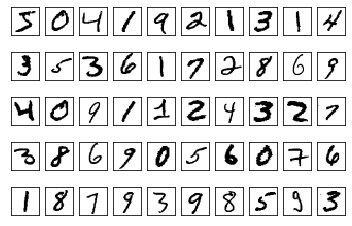

In [16]:
import matplotlib.pyplot as plt
amount= 50
lines = 5
columns = 10
number = np.zeros(amount)

for i in range(amount):
    number[i] = y_my[i]
    #print(number[i])

fig = plt.figure()

for i in range(amount):
    ax = fig.add_subplot(lines, columns, 1 + i)
    plt.imshow(x_my[i,:,:], cmap='binary')
    plt.sca(ax)
    ax.set_xticks([], [])
    ax.set_yticks([], [])

plt.show()


In [26]:
#import numpy as np
#np.set_printoptions(threshold=np.inf)

red_dim=50
x_my=x_my.reshape(1000,784)  

# 資料中心化，即指變數減去它的均值
mean_vals = x_my.mean(axis=0)  
mean_removed = x_my - mean_vals 
#print(mean_vals.shape)
#print(mean_removed.shape)

# 計算協方差矩陣（Find covariance matrix）
cov_mat = np.cov(mean_removed, rowvar=0) # shape：(784, 784)
#print('covariance matrix:\n',cov_mat,'\n','cov shape:',cov_mat.shape)

# 計算特徵值(Find eigenvalues and eigenvectors)
eig_vals, eig_vects = np.linalg.eig(cov_mat) # 計算特徵值和特徵向量，shape分別為（784，）和(784, 784)
#print('未經排序的eig_vals:\n',eig_vals,'未經排序的eig_vects:\n',eig_vects)

# 對特徵值進行從大到小排序(故要加-號)，argsort返回的是索引，即下標
eig_val_index = np.argsort(eig_vals)  
#print('eig_val_index:\n',eig_val_index)
eig_vals=eig_vals[eig_val_index]
eig_vects=eig_vects[eig_val_index]
#print('經過排序的eig_vals:\n',eig_vals,'經過排序的eig_vects:\n',eig_vects) 


eig_val_index = eig_val_index[:-(red_dim + 1) : -1] # 最大的前top_n_feat個特徵的索引
# 取前top_n_feat個特徵後重構的特徵向量矩陣reorganize eig vects, 
# shape為(784, top_n_feat)，top_n_feat最大為特徵總數
reg_eig_vects = eig_vects[:, eig_val_index] 

# 將資料轉到新空間
low_d_data_mat = mean_removed.dot(reg_eig_vects) # shape: (100, top_n_feat), top_n_feat最大為特徵總數
recon_mat = (low_d_data_mat.dot(reg_eig_vects.T)) + mean_vals # 根據前幾個特徵向量重構回去的矩陣，shape:(100, 784)


reduce dim: 50


C:\Users\zhich\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


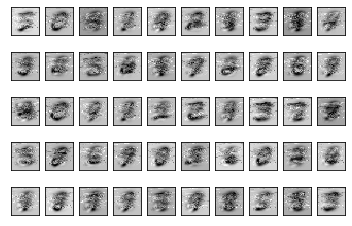

In [27]:
import numpy as np
import matplotlib.pyplot as plt
amount= 50
lines = 5
columns = 10
number = np.zeros(amount)

for i in range(amount):
    number[i] = y_test[i]
    # print(number[0])

fig = plt.figure()

print('reduce dim:',red_dim)
recon_mat=recon_mat.reshape(1000,28,28)
recon_mat=recon_mat.astype('float32')
#recon_mat/=255
for i in range(amount):
    ax = fig.add_subplot(lines, columns, 1 + i)
    plt.imshow(recon_mat[i,:,:], cmap='binary')
    plt.sca(ax)
    ax.set_xticks([], [])
    ax.set_yticks([], [])

plt.show()